<a href="https://colab.research.google.com/github/POJSpace/Deep_learning_pytorch/blob/main/exercises/01_pytorch_model1_pojspace_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Neural Network Model Excercise
- Look at new dataset that I created below. The function is y = X * X + X + b (non-linear function)
- Try to run a learning loop and looked to a results.
- Model with linear function canot leanr non-linear function, So edit the model so it can learn a non-linear function (try to change a forward method)
- Then try to use some different loss function and optimizer, for example nn.MSELoss() and torch.optim.Adam().
- Compare the result with previous methods.


### COMPETION
- The winner is the one who can achieve 0.0001 loss in the least number of epochs
- That ones who wins get as a price my Congratulation. XD
- Also you can share your results on discord.

In [ ]:
import torch
from torch import nn # neural network graphs

torch.__version__

'2.1.0+cu118'

In [ ]:
# Create known parameters for linear

b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1) # if you unsqueeze it on 1.dimension you get najs output of numbers, it makes najs list
y =  X * X + X + b # non-linear function

X_original = torch.arange(start,end,step)

X[:10], y[:10], X_original[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3204],
         [0.3416],
         [0.3636],
         [0.3864],
         [0.4100],
         [0.4344],
         [0.4596],
         [0.4856],
         [0.5124]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [ ]:
train_split = int(0.8 * len(X)) # make 80%

X_train, y_train = X[:train_split], y[:train_split] # make train dataset for x and y 80%
X_test, y_test = X[train_split:], y[train_split:] # make test dataset for x and y 20%

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
import matplotlib.pyplot as plt

def plt_predictions(train_data : torch.Tensor = X_train,
                     train_labels : torch.Tensor = y_train,
                     test_data : torch.Tensor = X_test,
                     test_labels : torch.Tensor = y_test,
                     predictions : torch.Tensor = None):
  """
  Plots training data, test data amd compares predictions.

  """
  plt.figure(figsize=(10,7)) # Size of a plot

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data") # draw dots from our tensor, plot dots with x and y position

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

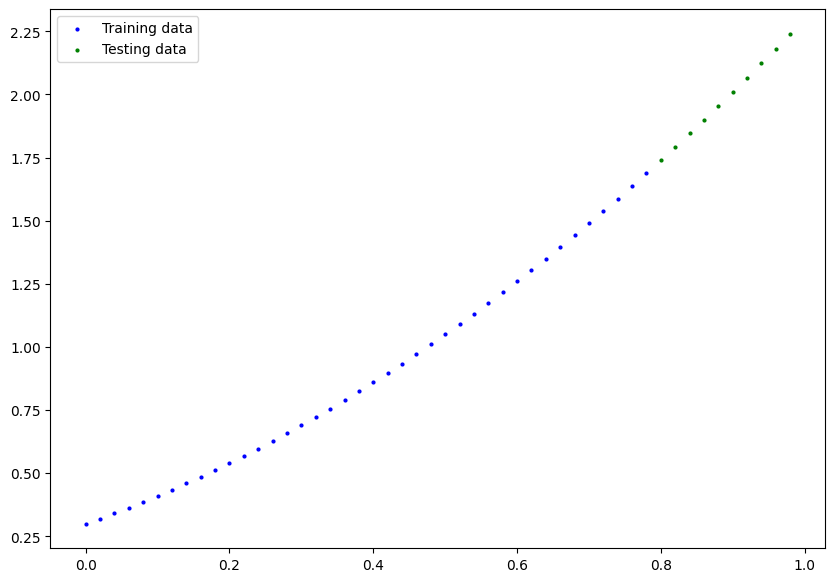

In [ ]:
plt_predictions() # we can use it without parameters because a default one are same as ours

# 1. Model


In [ ]:
# Create liner regression model class
class LinearRegressionModule(nn.Module): # <- everythink in PyTorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True, #<- this tels that we can manipulate and change the variable
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:# <- We need to overwrite this metod
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42) # it makes 1 seed and random functions will be same every time, it is used if you want to have same result as someone else

# Create an instance of the model

model_0 = LinearRegressionModule()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Making Predictions

In [ ]:
# Make predictions with models

with torch.inference_mode(): #<- this is lot faster if we dont need gradient
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

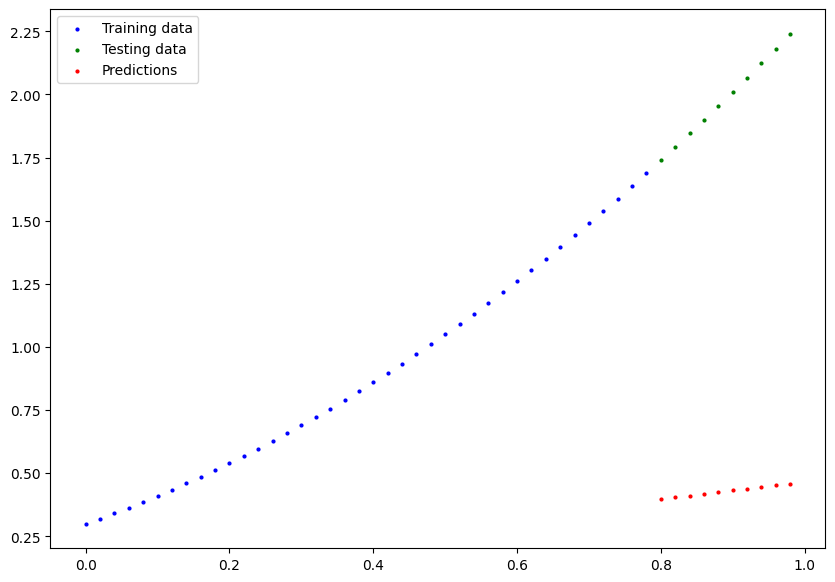

In [ ]:
plt_predictions(predictions=y_preds)

# Learning


In [ ]:
# We need to use loss function
loss_fn = nn.L1Loss()


#Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop (and testing)

0. Loop through the data

1. Forward pass goes through model

2. Calculate the loss

3. Optimize

4. Loss backward like a reverse engeneering

5. Optimizer step - Gradient descent

In [ ]:
epoch_count = []
loss_values = []
test_loss_values = []

In [ ]:
torch.manual_seed(42)

epochs = 1500

for epoch in range(epochs):

  ### Training
  model_0.train()

  # 1. Forward pass = push data trought model
  y_pred = model_0(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer
  optimizer.zero_grad() # <-- now I got it. It means that it zeros the gradient that exist before because otherwise the gradient would be a combination of the old and new gradient, which you have already used to update your model parameters

  # 4. backpropagation
  loss.backward() # <-- updating the Weights and biases by given gradient

  #5. Step optimizer
  optimizer.step() # <-- optimalize loss by given learning rate



  ### Testing
  model_0.eval() #<- turns of difrent settings

  with torch.inference_mode():
    # 1. ForwardPass
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)


  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  print(f"Epoch: {epoch + 1} | Loss: {loss} | Test loss: {loss}")


Epoch: 1 | Loss: 0.6352813839912415 | Test loss: 0.6352813839912415
Epoch: 2 | Loss: 0.6237603425979614 | Test loss: 0.6237603425979614
Epoch: 3 | Loss: 0.6122393608093262 | Test loss: 0.6122393608093262
Epoch: 4 | Loss: 0.6007183790206909 | Test loss: 0.6007183790206909
Epoch: 5 | Loss: 0.5891973376274109 | Test loss: 0.5891973376274109
Epoch: 6 | Loss: 0.5776763558387756 | Test loss: 0.5776763558387756
Epoch: 7 | Loss: 0.5661553144454956 | Test loss: 0.5661553144454956
Epoch: 8 | Loss: 0.5546343922615051 | Test loss: 0.5546343922615051
Epoch: 9 | Loss: 0.5431133508682251 | Test loss: 0.5431133508682251
Epoch: 10 | Loss: 0.5315923094749451 | Test loss: 0.5315923094749451
Epoch: 11 | Loss: 0.5200713872909546 | Test loss: 0.5200713872909546
Epoch: 12 | Loss: 0.5085502862930298 | Test loss: 0.5085502862930298
Epoch: 13 | Loss: 0.4970293641090393 | Test loss: 0.4970293641090393
Epoch: 14 | Loss: 0.48550835251808167 | Test loss: 0.48550835251808167
Epoch: 15 | Loss: 0.473987340927124 | Tes

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

list(model_0.parameters()) #you can see a results in your parameters

[Parameter containing:
 tensor([1.7607], requires_grad=True),
 Parameter containing:
 tensor([0.1953], requires_grad=True)]

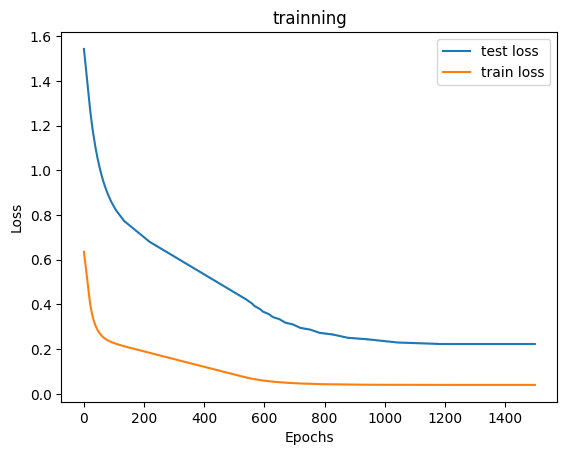

In [ ]:
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label = "test loss") #function plot gets only tensors in cpu and not pytorch tensors but numpys tensor so because this we need to do this: torch.tensor(test_loss_values).cpu().numpy()
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label = "train loss")
plt.title("trainning") # title
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

(None, None)

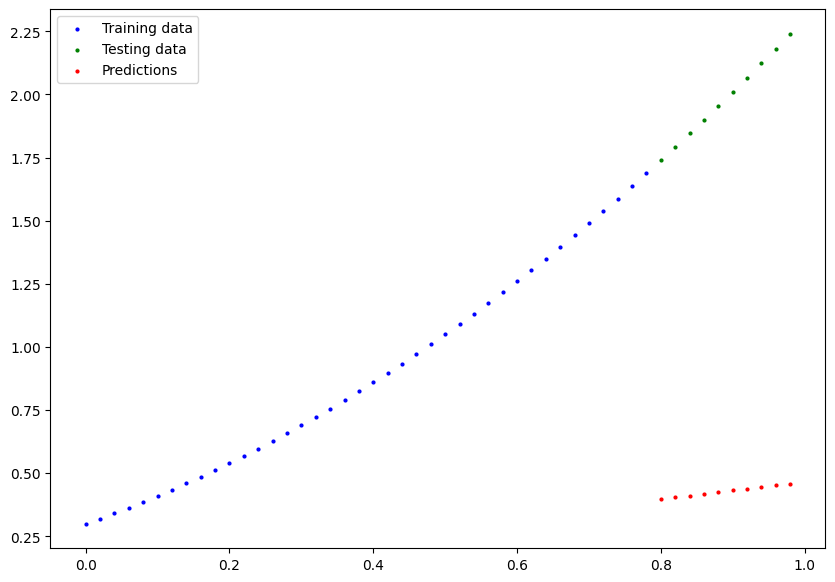

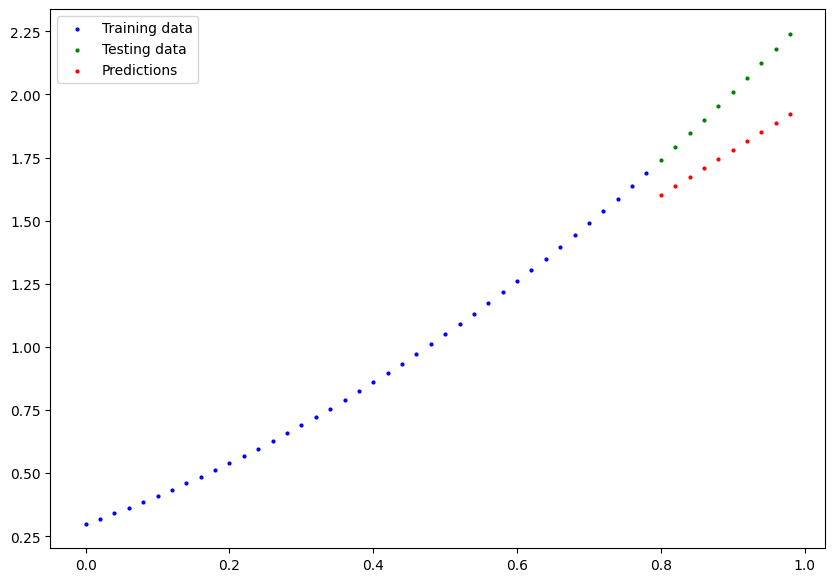

In [ ]:
plt_predictions(predictions=y_preds), plt_predictions(predictions=y_preds_new)


## Saving models in PyTorch

1. torch.save() - save PyTorch project to pytohon pickle format
2. torch.load() - load project
3. torch.nn.Module.load_state_dic() - this allowes saves your models in state dic

In [ ]:
# Saving our PyTorch modul
from pathlib import Path

model_path = Path("models") # get the path
model_path.mkdir(parents = True, exist_ok = True) # make a dir

model_name = "01_PyTorch_workflow_model_0.pth"
model_save_path = model_path / model_name # path to the file

torch.save(model_0.state_dict(), model_save_path) # save a model to given path

In [ ]:
torch.load(model_save_path) # our saved model

OrderedDict([('weights', tensor([1.7607])), ('bias', tensor([0.1953]))])

In [ ]:
model_0.state_dict() # our model in RAM

OrderedDict([('weights', tensor([1.7607])), ('bias', tensor([0.1953]))])

In [ ]:
loaded_model_0 = LinearRegressionModule() # if we load our model we just have a params of it, we also need a model structure

loaded_model_0.load_state_dict(torch.load(model_save_path)) # now we load a params to model structure

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict() # get the params

OrderedDict([('weights', tensor([1.7607])), ('bias', tensor([0.1953]))])

In [ ]:
# How to make predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds_new == loaded_model_preds # we can compare a results from our model and saved model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])